<a href="https://colab.research.google.com/github/Uz8351/MyPhython/blob/master/RegreBatch_Jueves_Clase_F435_Sep_7_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pérdida final: 1.013799292719701


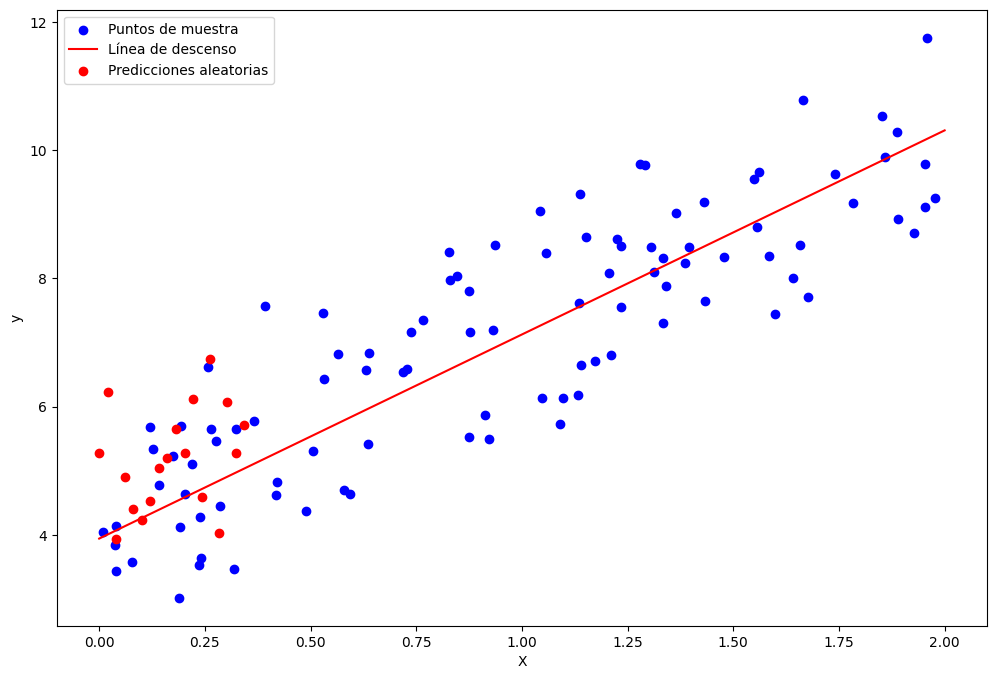

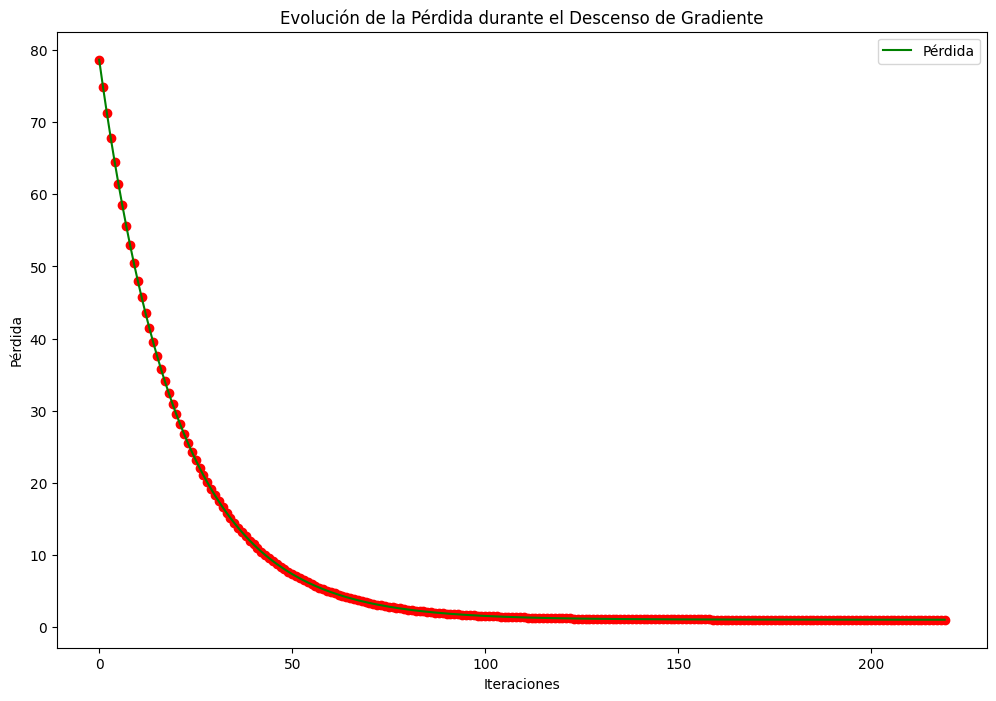

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generamos datos aleatorios
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Inicializamos los parámetros del modelo
theta = np.random.randn(2, 1)

# Hiperparámetros
learning_rate = 0.6
n_iterations = 220

# Almacenamos la historia de pérdida para visualización
loss_history = []

# Agregamos una columna de unos a la matriz X para el término de sesgo (bias)
X_b = np.c_[np.ones((100, 1)), X]

# Realizamos el descenso de gradiente en lote
for iteration in range(n_iterations):
    #gradients = -2/len(X) * X_b.T.dot(y - X_b.dot(theta))
    gradients = -2/len(X) * X_b.T.dot(y - X_b.dot(theta)) / len(X)
    theta -= learning_rate * gradients
    loss = np.mean((X_b.dot(theta) - y) ** 2)
    loss_history.append(loss)

# Generar tres predicciones basadas en los parámetros del modelo theta
np.random.seed(1)
random_samples = np.random.rand(18, 1)  # Generar valores aleatorios entre 0 y 1
random_predictions = theta[0] + theta[1] * random_samples

# Imprime la pérdida final
print("Pérdida final:", loss_history[-1])

# Establecemos el tamaño de la figura
plt.figure(figsize=(12, 8))

# Graficamos los puntos de muestra en azul
plt.scatter(X, y, c='blue', label='Puntos de muestra')

# Graficamos la línea de descenso en rojo
x_range = np.linspace(0, 2, 100)
y_pred = theta[0] + theta[1] * x_range
plt.plot(x_range, y_pred, c='red', label='Línea de descenso')

# Graficamos las predicciones aleatorias en negro
plt.scatter(x_range[:18], random_predictions, c='red', marker='o', label='Predicciones aleatorias')

plt.xlabel('X')
plt.ylabel('y')
plt.legend()

# Creamos una figura adicional para la gráfica de pérdidas
plt.figure(figsize=(12, 8))

# Graficamos la pérdida y los puntos rojos
plt.plot(range(n_iterations), loss_history, c='green', label='Pérdida')
for i, loss in enumerate(loss_history):
    plt.scatter(i, loss, c='red', marker='o')  # Punto rojo en cada pérdida

plt.xlabel('Iteraciones')
plt.ylabel('Pérdida')
plt.title('Evolución de la Pérdida durante el Descenso de Gradiente')
plt.legend()

plt.show()
